# Explore here

In [2]:
# LOAD DATASET
import pandas as pd
uslearning_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
uslearning_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
# FIND & DELETE DUPLICATE DATA

duplicates = uslearning_data[uslearning_data.duplicated()]
duplicates
#... none found

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


In [4]:
# FIND & DELETE NULL VALUES

uslearning_data.isnull().sum()
#... none found

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
# DEFINE VARIABLES TO STUDY & TEST IN DATASET | X
# DEFINE TARGET TO ESTABLISH FROM THOSE VARIABLES | y

X = uslearning_data[["Latitude", "Longitude", "MedInc"]]

In [6]:
# TRAIN MODEL ON THE RELATIONSHIP "MedInc" (now defined as 'y') HAS WITH CHOSEN TEST VARIABLES (defined as 'x')
# Get the system trained on the relationship "CHARGES" has shared with each variable: AGE, SMOKER_N, SEX from our existing dataset, being; WHOLE_DATA

from sklearn.model_selection import train_test_split

X_train, X_test= train_test_split(X, test_size = 0.2, random_state = 42)
X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [7]:
# BEGIN UNSUPERVISED LEARNING MODEL | CLUSTERING

from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [8]:
model.labels_

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [9]:
X_train["cluster"]=list(model.labels_)

In [10]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


<Axes: xlabel='Latitude', ylabel='Longitude'>

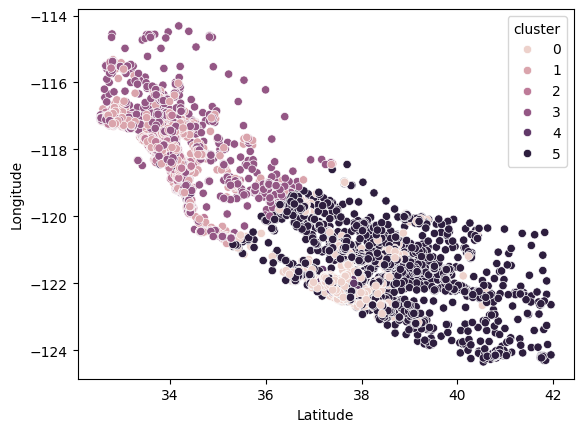

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data= X_train, x="Latitude", y="Longitude", hue= "cluster")

In [16]:
X_test ["cluster"] =list(model.predict (X_test))

<Axes: xlabel='Latitude', ylabel='Longitude'>

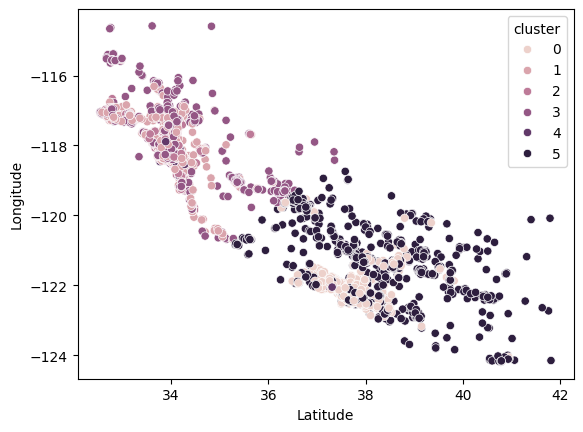

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data= X_test, x="Latitude", y="Longitude", hue= "cluster")

In [ ]:
# Predict clusters for the test set

test_clusters = model.predict(X_test)
test_clusters

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [ ]:
# Add predicted clusters as a new column to the test set DataFrame
X_test['Cluster'] = test_clusters

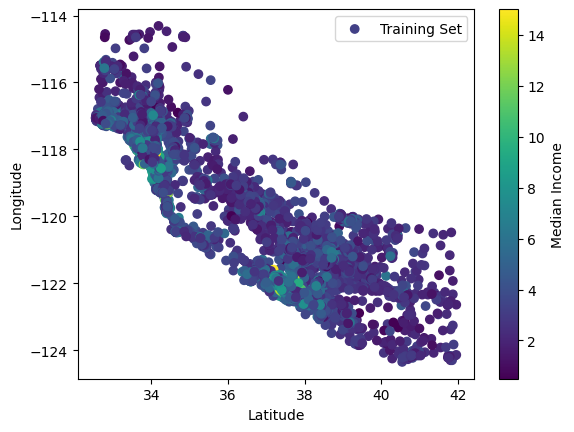

In [ ]:
# Plot training set points
plt.scatter(X_train["Latitude"], X_train["Longitude"], c=X_train["MedInc"], cmap='viridis', label='Training Set')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.colorbar(label="Median Income")
plt.legend()
plt.show()

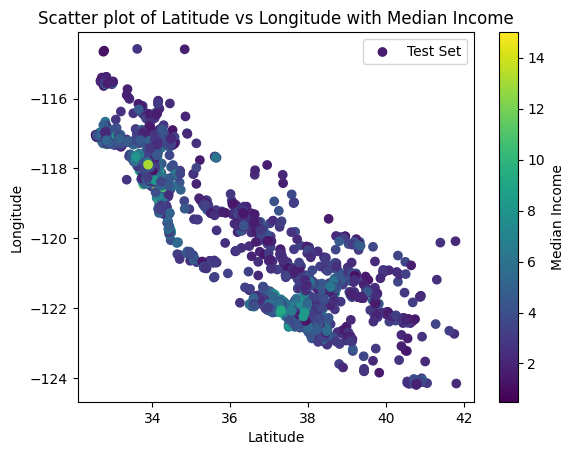

In [ ]:
# Plot test set points
plt.scatter(X_test["Latitude"], X_test["Longitude"], c=X_test["MedInc"], cmap='viridis', label='Test Set')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Scatter plot of Latitude vs Longitude with Median Income")
plt.colorbar(label="Median Income")
plt.legend()
plt.show()

In [ ]:
#Choose algo of supervised modelk (classification) e.g D.Tree) & train model with X_train in THIS Data set!!!
#Predict X_test (CLUSTER = Target) Use a y Target!!! MUST DROP 'CLUSTER' COLUMN TO WORK!!!
#y_train = COPY BEFORE DROPPING "Clusters" OR USE DIFFERENT NAME INSTEAD OF ´X_Train / x_test' BOTH
# Don't for get to use 'Accuracy Score'